# VGG19 Based Style Classifier

### Import Statements

In [1]:
from style_classifier_helper import *
from tqdm import tqdm
import random
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

### Load Training and Testing Image Data
* train_img_list is a list of all the training images stored as np.ndarry
* train_label_list is a list of the labels for the training images
* test_img_list is a list of all the testing images stored as np.ndarry
* test_label_list is a list of the labels for the test images

In [2]:
training_directory = "/home/jo_wang/Desktop/ECE661/HW07/data/training"
test_directory = "/home/jo_wang/Desktop/ECE661/HW07/data/testing"

train_img_list, train_label_list = loadImages(training_directory)
test_img_list, test_label_list = loadImages(test_directory)

assert(len(train_img_list) == len(train_label_list))
assert(len(test_img_list) == len(test_label_list))
assert(len(train_img_list) == 920)
assert(len(test_img_list) == 200)


### Obtain Feature Maps of all Training Images
1. Create an instance of the VGG19 class
2. Load the pre-trained weights
3. Iterate across both the test and train data
4. Extract feature map from the CNN
5. Compute the gram matrix for each image and store in the respective list
6. Display gram matrix plots for one image in each class

In [3]:
# Load the model and the provided pretrained weights
vgg = VGG19()
vgg.load_weights('/home/jo_wang/Desktop/ECE661/HW07/vgg_normalized.pth')

train_gram_matrix = list()
for i in tqdm(range(len(train_img_list))):
    ft = vgg(train_img_list[i])
    ft = np.resize(ft, (512, 256))
    gram_matrix = ft@ft.T
    train_gram_matrix.append(gram_matrix)

test_gram_matrix = list()
for i in tqdm(range(len(test_img_list))):
    ft = vgg(test_img_list[i])
    ft = np.resize(ft, (512, 256))
    gram_matrix = ft@ft.T
    test_gram_matrix.append(gram_matrix)

assert(len(train_gram_matrix) == len(train_img_list))
assert(len(test_gram_matrix) == len(test_img_list))

100%|██████████| 200/200 [02:07<00:00,  1.57it/s]


### Train Support Vector Machine
1. For every image in the train and test data set, sample 1024 features randomly
2. Build train and test features matrix
    * train: (920 x 1024)
    * test: (200 x 1024)
3. Fit the SVM model with the train data
4. Compute the accuracy on the test data
5. Display the confusion matrix

100%|██████████| 200/200 [00:05<00:00, 38.44it/s]


Accuracy: 0.955


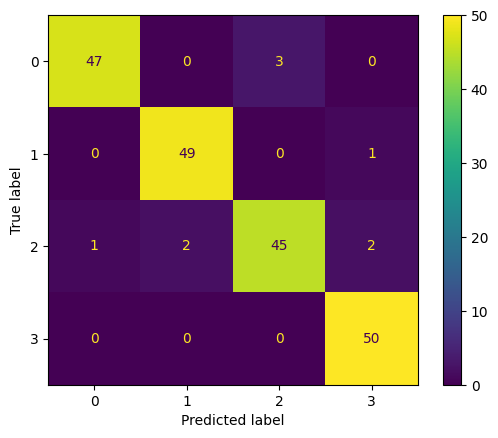

In [4]:
train_features = np.zeros((1,1024))
test_features = np.zeros((1,1024))

for gram in tqdm(train_gram_matrix):
    random.seed(5283)
    gram_as_list = gram.flatten().tolist()
    sampled_features = random.sample(gram_as_list, 1024)
    sampled_features = np.resize(sampled_features, (1,1024))
    train_features = np.vstack((train_features, sampled_features))

for gram in tqdm(test_gram_matrix):
    random.seed(5283)
    gram_as_list = gram.flatten().tolist()
    sampled_features = random.sample(gram_as_list, 1024)
    sampled_features = np.resize(sampled_features, (1,1024))
    test_features = np.vstack((test_features, sampled_features))

assert(train_features[1:,:].shape == (920, 1024))
assert(test_features[1:,:].shape == (200, 1024))

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_features[1:,:], train_label_list)
texture_predict = clf.predict(test_features[1:,:])
print("Accuracy:",metrics.accuracy_score(test_label_list, texture_predict))
ConfusionMatrixDisplay.from_estimator(clf, test_features[1:,:], test_label_list)